In [1]:
# Import Modules #
import os, sys, importlib
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import sys
sys.path.append('../')
import more_metrics


# Load Example Data

In [2]:
data = load_breast_cancer()

In [3]:
df = pd.DataFrame(data=data['data'],columns=data['feature_names'])
df['label']=data['target']
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.40, random_state=123)

## Excluding features for the reference model just for the example

In [4]:
ref_feat, new_feat, bla = [],[], []
for i in data['feature_names']:
    if 'fractal' in i or 'smoothness' in i or 'texture' in i or 'concave' in i or 'compactness' in i:
        ref_feat+=[i]
    else:
        bla+=[i]
    new_feat+=[i]
len(ref_feat),len(new_feat)

(15, 30)

# Model

In [5]:
ref_model = RandomForestClassifier()
new_model = RandomForestClassifier()
ref_model.fit(x_train[ref_feat], y_train)
new_model.fit(x_train[new_feat], y_train)

RandomForestClassifier()

In [6]:
test_ref_pred=ref_model.predict_proba(x_test[ref_feat])
test_new_pred=new_model.predict_proba(x_test[new_feat])

# Area Under the Curve with CI

Reference AUC: 0.9883928571428572
New AUC: 0.9951704545454546


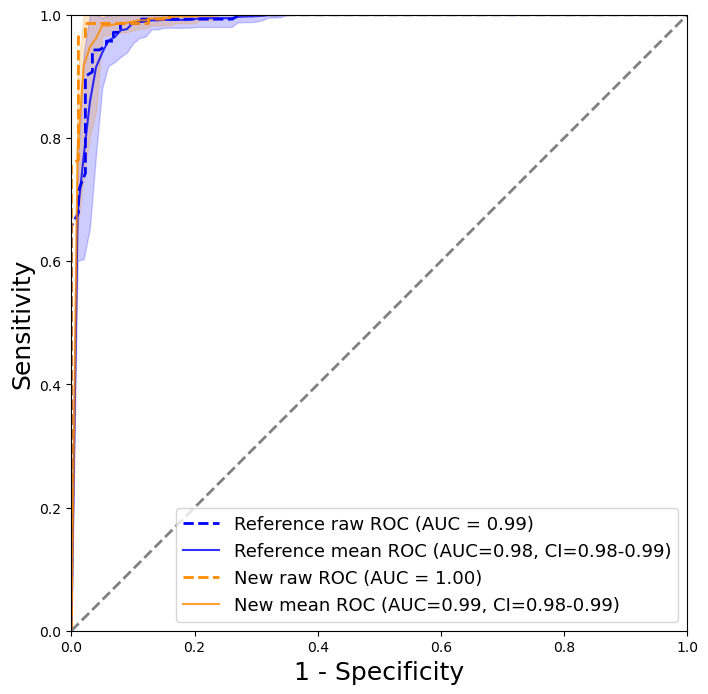

In [7]:
bs = 10
more_metrics.plot_comparing_aucs(y_test.values,test_ref_pred[:,1],test_new_pred[:,1],n_bootstraps=bs)

# Net Reclassification Index 

In [8]:
print(more_metrics.category_free_nri(y_test.values,test_ref_pred[:,1],test_new_pred[:,1]))

(0.5285714285714286, 0.5227272727272727, 1.0512987012987014)


In [9]:
print(more_metrics.calculate_nri(y_test.values,test_ref_pred[:,1],test_new_pred[:,1],  [0.02,0.1,0.5,0.95]))

(0.22142857142857142, 0.3409090909090909, 0.5623376623376624)


# IDI Curve

In [10]:
label_dict = {2:'BI-RADS 3/4a Border (2%)',10:'BI-RADS 4a/4b Border (10%)',50:'BI-RADS 4b/4c Border (50%)',95:'BI-RADS 4c/5 Border (95%)'}
idi_out = more_metrics.plot_idi(y_test.values,test_ref_pred[:,1],test_new_pred[:,1], label_dict, bs, show=False)

IDI, = 7.91
IDI Events, = 4.31
IDI Nonevents, = 3.6
IS Positive, = 4.35
IS Negative, = 0.04
IP Positive, = 3.66
IP Negative, = 0.06
Threshold = 0.02,  NRI Events = 0.0, NRI NonEvents = 0.3, NRI Total = 0.3
Threshold = 0.1,  NRI Events = -0.0, NRI NonEvents = 0.06, NRI Total = 0.06
Threshold = 0.5,  NRI Events = 0.03, NRI NonEvents = 0.03, NRI Total = 0.06
Threshold = 0.95,  NRI Events = 0.21, NRI NonEvents = 0.0, NRI Total = 0.21


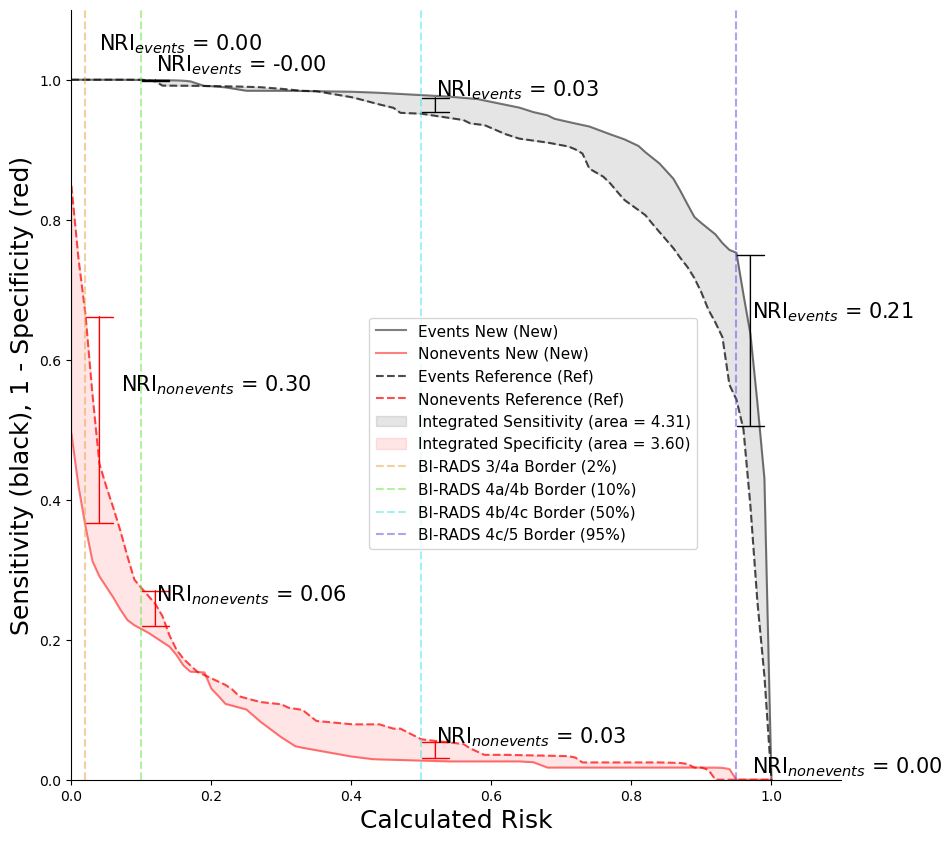

In [11]:
for key, value in idi_out['IDI'].items():
    print(f"{key}, = {round(value,2)}")

for key, value in idi_out['NRI'].items():
    print(f"Threshold = {round(key,2)},  NRI Events = {round(value[0],2)}, NRI NonEvents = {round(value[1],2)}, NRI Total = {round(value[2],2)}")

idi_out['plot']


## New functions allow for different number of theresholds

### Example of only looking at the BI-RADS 3 and 4 threshold

In [12]:
print(more_metrics.calculate_nri(y_test.values,test_ref_pred[:,1],test_new_pred[:,1],  [0.02]))

(0.0, 0.28409090909090906, 0.28409090909090906)


IS positive 4.32 IS negative 0.05 IDI events 4.27
IP positive 3.97 IP negative 0.03 IDI nonevents 3.94
IDI = 8.21


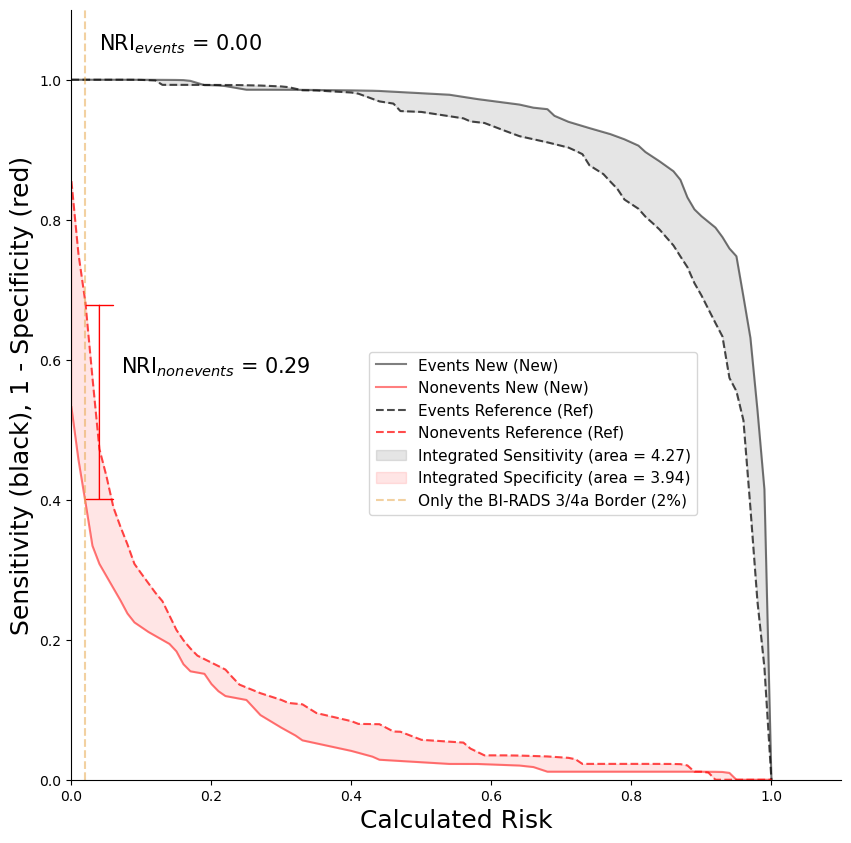

In [15]:
idi_out = more_metrics.plot_idi(y_test.values,test_ref_pred[:,1],test_new_pred[:,1],{2:'Only the BI-RADS 3/4a Border (2%)',}, show=True)
idi_out['plot']

In [14]:
sys.exit(0)

SystemExit: 0

/home/laleong/anaconda3/envs/uwrad_23/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
